In [1]:
import math
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

# 逆行列
* 行列式を求める linalg.det(A)
* 逆行列を求める linalg.inv(A)
    * 逆行列を求められない時 LinAlgError が発生する

In [2]:
A = np.array([[1,2,3],[9,4,3],[5,8,1]], dtype=float)
print("A=\n{}".format(A))
print("det(A) = {}".format(linalg.det(A)))
B = linalg.inv(A)
print("inverse A=\n{}".format(B))
print("A・inverseA=\n{}".format(np.dot(A,B)))

A=
[[1. 2. 3.]
 [9. 4. 3.]
 [5. 8. 1.]]
det(A) = 148.0
inverse A=
[[-0.13513514  0.14864865 -0.04054054]
 [ 0.04054054 -0.09459459  0.16216216]
 [ 0.35135135  0.01351351 -0.09459459]]
A・inverseA=
[[ 1.00000000e+00 -2.08166817e-17  5.55111512e-17]
 [ 2.22044605e-16  1.00000000e+00  1.66533454e-16]
 [ 5.55111512e-17 -8.15320034e-17  1.00000000e+00]]


逆行列が存在しない時に　LinAlgError が発生する仕様は、あまり信用しないほうが良いかも
$$
\begin{bmatrix}
1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 
\end{bmatrix} 
$$
は、逆行列が存在しないけど、LinAlgError が発生せずに誤った逆行列が計算される。当然 M・inv(M) は I(単位行列) にならない

In [3]:
M = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=float)
print("M=\n{}".format(M))
print("det(M) = {}".format(linalg.det(M)))
try :
    print("inverse M= // it's wrong invert matrix \n{}".format(linalg.inv(M)))
    print("** linalg.inv(M) don't throw LinAlgError **")
except LinAlgError as err:
    print(err)
print("M・inverseM= // it's not an identity matrix \n{}".format(np.dot(M,linalg.inv(M))))

M=
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
det(M) = 0.0
inverse M= // it's wrong invert matrix 
[[ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]
 [-6.30503948e+15  1.26100790e+16 -6.30503948e+15]
 [ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]]
** linalg.inv(M) don't throw LinAlgError **
M・inverseM= // it's not an identity matrix 
[[ 0.  0.  0.]
 [-4.  0.  0.]
 [-4.  0.  0.]]


# ノルム
* 2次元、３次元の場合は、ベクトルの長さ
* 行列の場合はその拡張

In [4]:
v = np.array([2.0,3.0])
print("linalg.norm(np.array([2,3]))={} , sqr(2*2+3*3)={}".format(linalg.norm(v), math.sqrt(2.0*2.0+3.0*3.0)))
print("M=\n{}".format(M))
print("linalg.norm(M)={}".format(linalg.norm(M)))

linalg.norm(np.array([2,3]))=3.605551275463989 , sqr(2*2+3*3)=3.605551275463989
M=
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
linalg.norm(M)=16.881943016134134


# 最小二乗推定 (least-squares problems)
* scipy.lstsq(A,B) は、 y = a f(x) + b g(x) + c h(x) + d のとき、最も誤差の少ない a,b,c,d をもとめる

A には、入力パラメータを設定する
$$
 \begin{bmatrix}
f(0) & g(0) & h(0) & 1 \\
f(1) & g(1) & h(1) & 1 \\
f(2) & g(2) & h(2) & 1 \\
f(3) & g(3) & h(3) & 1 \\
\vdots & \vdots & \vdots & \vdots \\
f(n) & g(n) & h(n) & 1 \\
\end{bmatrix} 
$$

B には、y を設定する
$$
 \begin{bmatrix} y_0 & y_1 & y_2 & y_3 & \cdots  & y_n \end{bmatrix} 
$$    

``
(C, resid, rank, sigma) = linalg.lstsq(A, B)
``
    * C : 最小二乗解 [a b c d]
    * resid : 残差の合計
    * rank : 係数行列aのランク
    * sigma :  標準偏差

A=
[[0.    0.    0.    1.   ]
 [0.001 0.01  0.1   1.   ]
 [0.008 0.04  0.2   1.   ]
 [0.027 0.09  0.3   1.   ]
 [0.064 0.16  0.4   1.   ]
 [0.216 0.36  0.6   1.   ]
 [0.512 0.64  0.8   1.   ]
 [1.    1.    1.    1.   ]]
B=[5.2 4.  3.  3.8 4.4 5.4 6.6 6.8]
C=[-22.95848104  39.20132617 -14.58099132   5.07255296]
resid=0.5042085946678523
rank=4
sigma=[3.35026362 1.3730288  0.27820942 0.03761781]


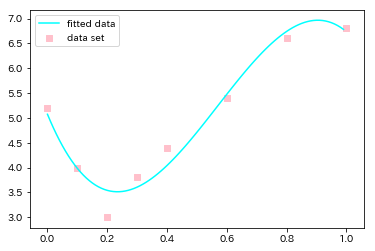

In [5]:
# raw data
y = np.array([5.2, 4.0, 3.0, 3.8, 4.4, 5.4, 6.6, 6.8])
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0])

# input matrix
A = np.array([x**3, x**2, x ,np.ones(len(x))]).T
B = y
print ("A=\n{}".format(A))
print ("B={}".format(B))

# least squares
C, resid, rank, sigma = linalg.lstsq(A, B)
print ("C={}".format(C))
print ("resid={}".format(resid))
print ("rank={}".format(rank))
print ("sigma={}".format(sigma))

# plot data
rx = np.arange(0.0,1.0,0.01,dtype=float)
ry = C[0]*rx*rx*rx + C[1]*rx*rx + C[2]*rx + C[3]

plt.figure()
plt.scatter(x, y, color='pink', marker='s', label='data set')
plt.plot(rx, ry, color='cyan', label='fitted data')
plt.legend()
plt.show()

# 固有値・固有ベクトル
* Eigenvalue, Eigenvector
```
A x = λ x
```
となるような x を A の固有ベクトル。λ を A の固有ベクトルと呼ぶ
* 固有方程式
```
A x = λ x
A x = λ I x
(A - λ I) x = 0
ここで (A - λ I) が逆行列を持つと x が存在しなくなるので、(A - λ I) は逆行列を持たない
∴ det (A - λ I) = 0  固有方程式
```
固有値・固有ベクトルを見つける ⇔ 固有方程式の解を見つける

In [6]:
A = np.array([[4.0,2.0],[1.0,8.0]])
w, v = linalg.eig(A)
print("分析対象行列 \n {}".format(A))
print("固有値 {}".format(w))
print("固有ベクトル \n {}".format(v))

np.set_printoptions(precision=3)
print("A・v0 = λ0・v0\n{} = {} x {}".format (A.dot(v[:,0]), w[0], v[:,0]))
print("A・v1 = λ1・v1\n{} = {} x {}".format (A.dot(v[:,1]), w[1], v[:,1]))


分析対象行列 
 [[4. 2.]
 [1. 8.]]
固有値 [3.55051026+0.j 8.44948974+0.j]
固有ベクトル 
 [[-0.97566304 -0.40997761]
 [ 0.21927526 -0.91209559]]
A・v0 = λ0・v0
[-3.464  0.779] = (3.5505102572168212+0j) x [-0.976  0.219]
A・v1 = λ1・v1
[-3.464 -7.707] = (8.449489742783179+0j) x [-0.41  -0.912]


# 固有値分解
* 固有ベクトルを並べたものを V とする
* 固有値を対角成分に並べた行列を Λ とする
$$
\Lambda = 
 \begin{bmatrix}
\lambda_{00} & 0 & 0 & 0 \\
0 & \lambda_{11} & 0 & 0 \\
0 & 0 & \lambda_{22}  & 0 \\
0 & 0 & 0 & \lambda_{33} \\
\end{bmatrix} 
$$
* 固有値分解とは
$$
AV=V \Lambda \\
A=V \Lambda V^{-1}
$$
の形式に A を分解すること
* A の n乗の計算が楽になる
$$
AA=V \Lambda V^{-1}V \Lambda V^{-1}=V \Lambda \Lambda V^{-1}=V \Lambda^{2}V^{-1} \\
\therefore A^n = V \Lambda^{n} V^{-1}
$$
* scipy の固有値分解 (eig) では、左固有ベクトルが変な形で返ってくる
    * 右固有ベクトル
$$
A V_r = V_r \Lambda
$$
    * 左固有ベクトル
$$
A^t V_l = V_l \Lambda^t
$$
    * 通常の固有値分解の形にするには
$$
V_l = V_l.conj().T \\
A = V_r \Lambda V_l
$$


In [7]:
A = np.array([[4.0,2.0],[1.0,8.0]])
print("分解元行列 \n {}".format(A))

# デフォルトオプションは right=True, left=False
w, vl, vr = linalg.eig(A, left=True)

m = np.diag(w)
# np.diag(vec) で対角成分が vec な対角行列 (diagnosis matrix) を作れる
#m = np.zeros(4).reshape(2,2).astype( np.complex )
#for cnt in range(w.size) :
#    m[cnt,cnt] = w[cnt].astype(np.complex)

print("----固有値分解結果----")
print("左固有ベクトル vl\n {}".format(vl))
print("固有値 Λ \n{}".format(m))
print("右固有ベクトル vr\n {}".format(vr))

print("----右固有値の検証----")
print("Ａ・vr = vr・Λ")
print("Ａ・vr = \n{}".format(A.dot(vr)))
print("vr・Λ = \n{}".format(vr.dot(m)))

print("----左固有値の検証 (scipyの計算結果) ----")
print("tＡ・vl = vl・tΛ")
print("tＡ・vl = \n{}".format((A.T).dot(vl)))
print("vl・tΛ = \n{}".format(vl.dot(m.T)))

print("----一般的な固有値分解の形式に変換---")
vl = vl.conj().T
print("vl = scipy_vl.conj().T =\n{}".format(vl))
print("Ｉ = vl・vr =\n{}".format(vl.dot(vr)))

print("Ａ = vr・Λ・vl")
print("Ａ =\n{}".format(A))
print("vr・Λ・vl =\n{}".format(vr.dot(m).dot(vl)))

分解元行列 
 [[4. 2.]
 [1. 8.]]
----固有値分解結果----
左固有ベクトル vl
 [[-0.912 -0.219]
 [ 0.41  -0.976]]
固有値 Λ 
[[3.551+0.j 0.   +0.j]
 [0.   +0.j 8.449+0.j]]
右固有ベクトル vr
 [[-0.976 -0.41 ]
 [ 0.219 -0.912]]
----右固有値の検証----
Ａ・vr = vr・Λ
Ａ・vr = 
[[-3.464 -3.464]
 [ 0.779 -7.707]]
vr・Λ = 
[[-3.464+0.j -3.464+0.j]
 [ 0.779+0.j -7.707+0.j]]
----左固有値の検証 (scipyの計算結果) ----
tＡ・vl = vl・tΛ
tＡ・vl = 
[[-3.238 -1.853]
 [ 1.456 -8.244]]
vl・tΛ = 
[[-3.238+0.j -1.853+0.j]
 [ 1.456+0.j -8.244+0.j]]
----一般的な固有値分解の形式に変換---
vl = scipy_vl.conj().T =
[[-0.912  0.41 ]
 [-0.219 -0.976]]
Ｉ = vl・vr =
[[0.98 0.  ]
 [0.   0.98]]
Ａ = vr・Λ・vl
Ａ =
[[4. 2.]
 [1. 8.]]
vr・Λ・vl =
[[3.919+0.j 1.96 +0.j]
 [0.98 +0.j 7.838+0.j]]


# 特異値分解
* 固有値は正方行列でしか求められなかった、特異値はそれを一般の行列に拡大したもの
* いま、データ系列 X を
$$
X = 
\begin{pmatrix}
x_{11} & x_{12}  & \cdots & x_{1n} \\ 
x_{21} & x_{22} & \cdots & x_{2n}\\ 
\vdots & \vdots & \ddots & \vdots \\ 
x_{p1} & x_{p2} & \cdots & x_{pn} 
\end{pmatrix}
$$
とする。
* 特異値分解はこれを
$$
X = U \Sigma V^T
$$
の形式に展開したもの。Σは、特異値を対角成分に並べたもの　
$$
\Sigma =
\begin{pmatrix}
\sigma_{11} & 0  & \cdots & 0 \\ 
0 & \sigma_{22} & \cdots & 0 \\ 
\vdots & \vdots & \ddots & \vdots  \\ 
0 & 0 & \cdots & \sigma_{pp} \\ 
0 & 0 & \cdots & 0  \\ 
0 & 0 & \cdots & 0 
\end{pmatrix}
$$
* 特異値分解を使って、元データを新たな系列 Y に写像できる
$$
Y = U^T X = \Sigma V^T
$$
このとき、寄与度の小さい特異値に対する特異ベクトルを削除すると、Yの次数を下げることができる

In [8]:
A = np.array([
    [ 1.0,  9.0, 10.0],
    [ 3.0,  2.0,  5.0],
    [ 5.0,  6.0, 11.0],
    [ 7.0,  5.0, 12.0],
    [ 9.0,  3.0, 12.0]
])
print("分解元行列 \n {}".format(A))

u, s, vh = linalg.svd(A)

n, p = A.shape
print("n={} p={}".format(n,p))
m = np.zeros((n, p))
m[:p, :p] = np.diag(s)

print("----特異値分解結果----")
print("左特異ベクトル U\n {}".format(u))
print("特異値 Σ \n{}".format(m))
print("右特異ベクトル tV\n {}".format(vh))

print("----特異値の検算----")
print("A = Ｕ・Σ・tＶ = \n{}".format(u.dot(m).dot(vh)))

print("----写像 (完全) ----")
print("Ｙ＝Ａ・Ｖ = \n{}".format(A.dot(vh.T)))
print("Ｙ・-1Ｖ = \n{}".format(A.dot(vh.T).dot(vh)))

print("----次元を下げた写像 (累積特異値99%の指標までを使う) ----")
s_all = np.sum(s)
s_sum = 0.0
s_threshold = 0.99
s_active_row = 0
for k in range(s.size) :
    s_sum = s_sum + s[k]
    print("σ({}) = {} ({}%)".format(k, s[k],  100.0 * s[k] / s_all))
    if (s_sum / s_all > s_threshold) :
        s_active_row = k
        break

vh2 = np.delete(vh, range(s_active_row+1, p), axis=0)
print("tV2 = \n{}".format(vh2))
print("Ｙ＝Ａ・Ｖ2 = \n{}".format(A.dot(vh2.T)))
print("Ｙ・-1Ｖ2 = \n{}".format(A.dot(vh2.T).dot(vh2)))


分解元行列 
 [[ 1.  9. 10.]
 [ 3.  2.  5.]
 [ 5.  6. 11.]
 [ 7.  5. 12.]
 [ 9.  3. 12.]]
n=5 p=3
----特異値分解結果----
左特異ベクトル U
 [[-0.43  -0.797  0.078  0.148  0.389]
 [-0.217  0.087  0.882  0.243 -0.329]
 [-0.476 -0.119 -0.083 -0.724 -0.477]
 [-0.52   0.171 -0.448  0.605 -0.365]
 [-0.521  0.56   0.092 -0.166  0.616]]
特異値 Σ 
[[2.830e+01 0.000e+00 0.000e+00]
 [0.000e+00 7.273e+00 0.000e+00]
 [0.000e+00 0.000e+00 9.360e-16]
 [0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00]]
右特異ベクトル tV
 [[-0.416 -0.4   -0.816]
 [ 0.702 -0.712 -0.009]
 [-0.577 -0.577  0.577]]
----特異値の検算----
A = Ｕ・Σ・tＶ = 
[[ 1.  9. 10.]
 [ 3.  2.  5.]
 [ 5.  6. 11.]
 [ 7.  5. 12.]
 [ 9.  3. 12.]]
----写像 (完全) ----
Ｙ＝Ａ・Ｖ = 
[[-1.218e+01 -5.798e+00 -8.882e-16]
 [-6.131e+00  6.362e-01 -4.441e-16]
 [-1.346e+01 -8.630e-01 -8.882e-16]
 [-1.471e+01  1.244e+00  0.000e+00]
 [-1.475e+01  4.072e+00 -1.776e-15]]
Ｙ・-1Ｖ = 
[[ 1.  9. 10.]
 [ 3.  2.  5.]
 [ 5.  6. 11.]
 [ 7.  5. 12.]
 [ 9.  3. 12.]]
----次元を下げた写像 (累積特異値99%の指標までを使う) ---